# Usage Documentation

## Import Dependencies

In [1]:
import sys
sys.path.append('../source/ServerlessAppPerfCostMdlOpt')
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")
from ServerlessAppWorkflow import ServerlessAppWorkflow
from AppGenerator import AppGenerator
from PerfOpt import PerfOpt

## Define the workflow of a serverless application

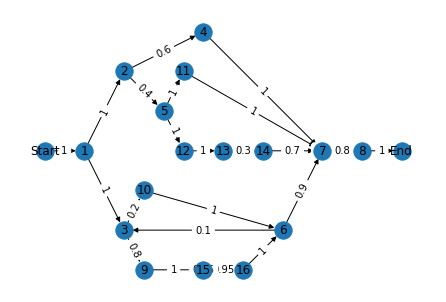

In [2]:
AppWorkflow_G = nx.DiGraph()

# Define functions and structural vertices in the App
# AppWorkflow_G.add_node($Vertex_Name, pos=$Vertex_Position)
AppWorkflow_G.add_node('Start', pos=(0, 1))
AppWorkflow_G.add_node(1, pos=(1, 1))
AppWorkflow_G.add_node(2, pos=(2, 2))
AppWorkflow_G.add_node(3, pos=(2, 0))
AppWorkflow_G.add_node(9, pos=(2.5, -0.5))
AppWorkflow_G.add_node(15, pos=(4, -0.5))
AppWorkflow_G.add_node(16, pos=(5, -0.5))
AppWorkflow_G.add_node(10, pos=(2.5, 0.5))
AppWorkflow_G.add_node(4, pos=(4, 2.5))
AppWorkflow_G.add_node(5, pos=(3, 1.5))
AppWorkflow_G.add_node(11, pos=(3.5, 2))
AppWorkflow_G.add_node(12, pos=(3.5, 1))
AppWorkflow_G.add_node(13, pos=(4.5, 1))
AppWorkflow_G.add_node(14, pos=(5.5, 1))
AppWorkflow_G.add_node(6, pos=(6, 0))
AppWorkflow_G.add_node(7, pos=(7, 1))
AppWorkflow_G.add_node(8, pos=(8, 1))
AppWorkflow_G.add_node('End', pos=(9, 1))

# Define edges and the transition probability
# AppWorkflow_G.add_weighted_edges_from([$start from, $end at, $transition probability])
AppWorkflow_G.add_weighted_edges_from([(1, 2, 1),(1, 3, 1),(2, 4, 0.6),(2, 5, 0.4),(4, 7, 1),(5, 11, 1),(5, 12, 1),(11, 7, 1),(12, 13, 1),(13, 14, 1),(14, 13, 0.3),(14, 7, 0.7),(3, 9, 0.8),(3, 10, 0.2),(9, 15, 1),(15, 16, 0.95),(15, 15, 0.05),(16, 6, 1),(10, 6, 1), (6, 7, 0.9), (6, 3, 0.1), (7, 8, 0.8),(7, 7, 0.2)])
AppWorkflow_G.add_weighted_edges_from([('Start', 1, 1), (8, 'End', 1)])

# Show the workflow graph
pos_AppWorkflow_G = nx.get_node_attributes(AppWorkflow_G, 'pos')
nx.draw(AppWorkflow_G, pos_AppWorkflow_G, with_labels=True)
labels_AppWorkflow_G = nx.get_edge_attributes(AppWorkflow_G, 'weight')
nx.draw_networkx_edge_labels(AppWorkflow_G, pos_AppWorkflow_G, edge_labels=labels_AppWorkflow_G)
pos_higher_offset_AppWorkflow_G = {}
for k, v in pos_AppWorkflow_G.items():
    pos_higher_offset_AppWorkflow_G[k] = (v[0], v[1] + 0.15)
plt.show()

## Use the performance model to get the average end-to-end response time of a serverless application

### Define the performance (response time in ms) of functions

In [3]:
AppWorkflow_G.nodes[1]['rt'] = 768.23935
AppWorkflow_G.nodes[2]['rt'] = 204.44438666666665
AppWorkflow_G.nodes[3]['rt'] = 525.3339015713016
AppWorkflow_G.nodes[4]['rt'] = 848.5232830820771
AppWorkflow_G.nodes[5]['rt'] = 205.84332234130255
AppWorkflow_G.nodes[6]['rt'] = 507.06963577139476
AppWorkflow_G.nodes[7]['rt'] = 347.58557048748355
AppWorkflow_G.nodes[8]['rt'] = 235.33234666666667
AppWorkflow_G.nodes[9]['rt'] = 164.18543685756242
AppWorkflow_G.nodes[10]['rt'] = 364.45012288786484
AppWorkflow_G.nodes[11]['rt'] = 1049.8307584501235
AppWorkflow_G.nodes[12]['rt'] = 787.509307502061
AppWorkflow_G.nodes[13]['rt'] = 377.8240525114155
AppWorkflow_G.nodes[14]['rt'] = 232.72174657534248
AppWorkflow_G.nodes[15]['rt'] = 287.0198944033791
AppWorkflow_G.nodes[16]['rt'] = 193.61988628026415

### Performance modeling

* Inputs:
    * App workflow graph
    * Performance of functions

In [4]:
App = ServerlessAppWorkflow(G=AppWorkflow_G.copy(), delayType='SFN') # delayType='SFN': Use the delay model of AWS Step Functions as the transition delay
App.get_simple_dag()
AppERT = App.get_avg_rt()
print("Average End-to-end Response Time in ms: {} (use the delay model of AWS Step Functions as the transition delay)".format(AppERT))

App = ServerlessAppWorkflow(G=AppWorkflow_G.copy(), delayType='None') # delayType='None': The transition delay is considered as 0.
App.get_simple_dag()
AppERT = App.get_avg_rt()
print("Average End-to-end Response Time in ms: {} (the transition delay is 0 everywhere)".format(AppERT)) 

Average End-to-end Response Time in ms: 3591.2615397450927 (use the delay model of AWS Step Functions as the transition delay)
Average End-to-end Response Time in ms: 3354.881636236321 (the transition delay is 0 everywhere)


In [5]:
# Define Delay
AppWorkflow_G.nodes['Start']['delay'] = 0
AppWorkflow_G.nodes[1]['delay'] = 0
AppWorkflow_G.nodes[2]['delay'] = 0
AppWorkflow_G.nodes[3]['delay'] = 0
AppWorkflow_G.nodes[4]['delay'] = 0
AppWorkflow_G.nodes[5]['delay'] = 0
AppWorkflow_G.nodes[6]['delay'] = 0
AppWorkflow_G.nodes[7]['delay'] = 0
AppWorkflow_G.nodes[8]['delay'] = 0
AppWorkflow_G.nodes[9]['delay'] = 0
AppWorkflow_G.nodes[10]['delay'] = 0
AppWorkflow_G.nodes[11]['delay'] = 0
AppWorkflow_G.nodes[12]['delay'] = 0
AppWorkflow_G.nodes[13]['delay'] = 0
AppWorkflow_G.nodes[14]['delay'] = 0
AppWorkflow_G.nodes[15]['delay'] = 0
AppWorkflow_G.nodes[16]['delay'] = 0
AppWorkflow_G.nodes['End']['delay'] = 0
AppWorkflow_G.edges[('Start', 1)]['delay'] = 10
AppWorkflow_G.edges[(1, 2)]['delay'] = 10
AppWorkflow_G.edges[(1, 3)]['delay'] = 10
AppWorkflow_G.edges[(2, 4)]['delay'] = 14
AppWorkflow_G.edges[(2, 5)]['delay'] = 10
AppWorkflow_G.edges[(3, 9)]['delay'] = 10
AppWorkflow_G.edges[(3, 10)]['delay'] = 10
AppWorkflow_G.edges[(9, 15)]['delay'] = 10
AppWorkflow_G.edges[(15, 16)]['delay'] = 10
AppWorkflow_G.edges[(15, 15)]['delay'] = 10
AppWorkflow_G.edges[(16, 6)]['delay'] = 10
AppWorkflow_G.edges[(10, 6)]['delay'] = 10
AppWorkflow_G.edges[(4, 7)]['delay'] = 18
AppWorkflow_G.edges[(5, 11)]['delay'] = 10
AppWorkflow_G.edges[(5, 12)]['delay'] = 10
AppWorkflow_G.edges[(11, 7)]['delay'] = 10
AppWorkflow_G.edges[(12, 13)]['delay'] = 10
AppWorkflow_G.edges[(13, 14)]['delay'] = 10
AppWorkflow_G.edges[(14, 13)]['delay'] = 10
AppWorkflow_G.edges[(14, 7)]['delay'] = 10
AppWorkflow_G.edges[(6, 7)]['delay'] = 10
AppWorkflow_G.edges[(6, 3)]['delay'] = 10
AppWorkflow_G.edges[(7, 8)]['delay'] = 10
AppWorkflow_G.edges[(7, 7)]['delay'] = 10
AppWorkflow_G.edges[(8, 'End')]['delay'] = 10
App = ServerlessAppWorkflow(G=AppWorkflow_G.copy(), delayType='Defined') # delayType='Defined': Use the delay from the input.
App.get_simple_dag()
AppERT = App.get_avg_rt()
print("Average End-to-end Response Time in ms: {} (use the delay from the input)".format(AppERT)) 

Average End-to-end Response Time in ms: 3464.7099570383257 (use the delay from the input)


## Use the cost model to get the average cost of a serverless application

### Define the performance (response time in ms) of functions

In [7]:
AppWorkflow_G.nodes[1]['rt'] = 768.23935
AppWorkflow_G.nodes[2]['rt'] = 204.44438666666665
AppWorkflow_G.nodes[3]['rt'] = 525.3339015713016
AppWorkflow_G.nodes[4]['rt'] = 848.5232830820771
AppWorkflow_G.nodes[5]['rt'] = 205.84332234130255
AppWorkflow_G.nodes[6]['rt'] = 507.06963577139476
AppWorkflow_G.nodes[7]['rt'] = 347.58557048748355
AppWorkflow_G.nodes[8]['rt'] = 235.33234666666667
AppWorkflow_G.nodes[9]['rt'] = 164.18543685756242
AppWorkflow_G.nodes[10]['rt'] = 364.45012288786484
AppWorkflow_G.nodes[11]['rt'] = 1049.8307584501235
AppWorkflow_G.nodes[12]['rt'] = 787.509307502061
AppWorkflow_G.nodes[13]['rt'] = 377.8240525114155
AppWorkflow_G.nodes[14]['rt'] = 232.72174657534248
AppWorkflow_G.nodes[15]['rt'] = 287.0198944033791
AppWorkflow_G.nodes[16]['rt'] = 193.61988628026415

### Define the memory configuration (allocated memory size in MB) of functions

In [8]:
AppWorkflow_G.nodes[1]['mem'] = 1536
AppWorkflow_G.nodes[2]['mem'] = 1792
AppWorkflow_G.nodes[3]['mem'] = 576
AppWorkflow_G.nodes[4]['mem'] = 2240
AppWorkflow_G.nodes[5]['mem'] = 896
AppWorkflow_G.nodes[6]['mem'] = 1728
AppWorkflow_G.nodes[7]['mem'] = 128
AppWorkflow_G.nodes[8]['mem'] = 128
AppWorkflow_G.nodes[9]['mem'] = 256
AppWorkflow_G.nodes[10]['mem'] = 320
AppWorkflow_G.nodes[11]['mem'] = 1920
AppWorkflow_G.nodes[12]['mem'] = 1984
AppWorkflow_G.nodes[13]['mem'] = 1088
AppWorkflow_G.nodes[14]['mem'] = 640
AppWorkflow_G.nodes[15]['mem'] = 896
AppWorkflow_G.nodes[16]['mem'] = 1088

### Cost modeling

* Inputs:
    * App workflow graph
    * Performance of functions
    * Memory configuration of functions

In [12]:
App = ServerlessAppWorkflow(G=AppWorkflow_G.copy(), delayType='SFN')
App.update_NE()
print('NE:')
print(App.ne)
AppCost = App.get_avg_cost()
print("Average Cost per 1 Million Executions Reported by Model: {}".format(AppCost))

NE:
{'Start': 0, 1: 1, 2: 1, 3: 1.1111111111111112, 9: 0.888888888888889, 15: 0.935672514619883, 16: 0.888888888888889, 10: 0.22222222222222224, 4: 0.6, 5: 0.4, 11: 0.4, 12: 0.4, 13: 0.5714285714285715, 14: 0.5714285714285715, 6: 1.1111111111111112, 7: 1.25, 8: 1, 'End': 0}
Average Cost per 1 Million Executions Reported by Model: 117.71743024227234


## Inputs for the optimization algorithm

### Define the workflow

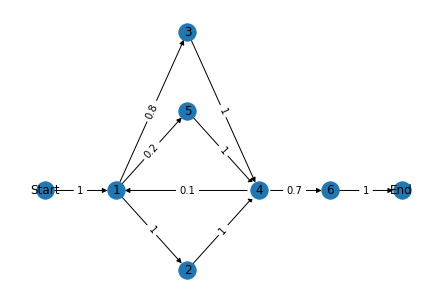

In [14]:
App6_G = nx.DiGraph()

# Define functions and structural vertices in the App
# AppWorkflow_G.add_node($Vertex_Name, pos=$Vertex_Position)
App6_G.add_node('Start', pos=(0, 1))
App6_G.add_node(1, pos=(1, 1))
App6_G.add_node(2, pos=(2, 0))
App6_G.add_node(3, pos=(2, 3))
App6_G.add_node(4, pos=(3, 1))
App6_G.add_node(5, pos=(2, 2))
App6_G.add_node(6, pos=(4, 1))
App6_G.add_node('End', pos=(5, 1))

# Define edges and the transition probability
# AppWorkflow_G.add_weighted_edges_from([$start from, $end at, $transition probability])
App6_G.add_weighted_edges_from([(1, 2, 1), (1, 5, 0.2), (1, 3, 0.8), (3, 4, 1), (5, 4, 1), (2, 4, 1), (4, 1, 0.1),
                          (4, 4, 0.2), (4, 6, 0.7)])
App6_G.add_weighted_edges_from([('Start', 1, 1), (6, 'End', 1)])

# Show the workflow graph
pos_App6_G = nx.get_node_attributes(App6_G, 'pos')
nx.draw(App6_G, pos_App6_G, with_labels=True)
labels_App6_G = nx.get_edge_attributes(App6_G, 'weight')
nx.draw_networkx_edge_labels(App6_G, pos_App6_G, edge_labels=labels_App6_G)
pos_higher_offset_App6_G = {}
for k, v in pos_App6_G.items():
    pos_higher_offset_App6_G[k] = (v[0], v[1] + 0.15)
plt.show()

### Define the performance profile of functions

#### Method 1: Define by passing PF directly

In [87]:
f1_pf = {128: 5500.4866999999995, 192: 3674.8530999999994, 256: 2725.8923, 320: 2148.4905000000003, 384: 1771.1575, 448: 1502.8815, 512: 1301.2842, 576: 1144.3912, 640: 1013.1754000000001, 704: 926.5277999999998, 768: 835.1147, 832: 780.8069000000003, 896: 746.0372, 960: 723.9654999999999, 1024: 742.8131000000001, 1088: 715.9623999999999, 1152: 733.8956000000002, 1216: 767.1371000000003, 1280: 707.7513, 1344: 776.39, 1408: 722.9680000000001, 1472: 676.1344000000001, 1536: 707.1422, 1600: 704.9714, 1664: 761.7915000000003, 1728: 698.8906999999999, 1792: 676.2910999999999, 1856: 767.4296, 1920: 787.3432, 1984: 789.8888000000001, 2048: 688.5601999999999, 2112: 789.7145000000002, 2176: 739.7988000000001, 2240: 701.5542999999999, 2304: 743.8631, 2368: 741.6306999999999, 2432: 740.4686999999998, 2496: 785.0328999999999, 2560: 692.6570999999999, 2624: 700.0512999999999, 2688: 764.4642000000001, 2752: 722.9775000000002, 2816: 700.8738000000001, 2880: 732.8464, 2944: 695.5066, 3008: 753.4839}
f2_pf = {128: 2898.2188999999994, 192: 1922.4316000000001, 256: 1425.9775999999995, 320: 1150.7265, 384: 953.4348000000001, 448: 811.3380999999999, 512: 700.4040000000002, 576: 629.4998, 640: 556.3427, 704: 510.6892, 768: 464.2314999999999, 832: 423.41310000000004, 896: 399.03869999999995, 960: 369.6110999999999, 1024: 344.49680000000006, 1088: 322.5969, 1152: 304.1409, 1216: 294.3993, 1280: 271.0062, 1344: 267.3689, 1408: 251.153, 1472: 242.73329999999999, 1536: 235.78379999999999, 1600: 223.15850000000003, 1664: 222.29129999999998, 1728: 215.491, 1792: 202.71560000000002, 1856: 204.17969999999997, 1920: 202.31969999999998, 1984: 203.7646, 2048: 201.59859999999998, 2112: 200.0368, 2176: 203.28369999999998, 2240: 200.2895, 2304: 204.58439999999996, 2368: 200.57219999999998, 2432: 201.2618, 2496: 200.9125, 2560: 200.55780000000001, 2624: 203.90529999999995, 2688: 200.66140000000004, 2752: 203.4133, 2816: 203.4614, 2880: 204.29409999999996, 2944: 201.55410000000003, 3008: 200.59420000000003}
f3_pf = {128: 2409.1354, 192: 1605.9911, 256: 1202.6657, 320: 939.6917, 384: 790.8393000000001, 448: 696.9177000000001, 512: 591.0748, 576: 518.7573, 640: 482.61339999999996, 704: 420.4162, 768: 383.089, 832: 358.2605, 896: 336.92420000000004, 960: 328.37669999999997, 1024: 292.5811, 1088: 267.7776, 1152: 261.7981, 1216: 248.14419999999996, 1280: 232.6674, 1344: 221.45959999999997, 1408: 211.8561, 1472: 202.5364, 1536: 195.3067, 1600: 191.68619999999996, 1664: 180.68119999999996, 1728: 179.79210000000003, 1792: 170.52989999999997, 1856: 170.1544, 1920: 170.1789, 1984: 168.60920000000002, 2048: 167.9793, 2112: 172.21650000000002, 2176: 165.96130000000002, 2240: 173.9336, 2304: 175.0984, 2368: 165.9825, 2432: 170.70719999999994, 2496: 169.6841, 2560: 169.5686, 2624: 170.42140000000003, 2688: 172.299, 2752: 170.31539999999998, 2816: 170.0025, 2880: 171.7793, 2944: 168.07539999999997, 3008: 169.77300000000002}
f4_pf = {128: 6180.600600000001, 192: 4237.538600000001, 256: 3289.4039000000002, 320: 2739.3443000000007, 384: 2489.5899999999997, 448: 2122.9276, 512: 1933.9807, 576: 1765.8597, 640: 1561.9238, 704: 1522.5382999999995, 768: 1362.6908, 832: 1285.8076, 896: 1247.5121, 960: 1241.3156000000001, 1024: 1172.5088000000003, 1088: 1149.2724, 1152: 1046.2866, 1216: 1025.6652000000001, 1280: 973.8288999999997, 1344: 1013.2251000000001, 1408: 960.9827, 1472: 968.9765999999998, 1536: 956.8087999999999, 1600: 897.5600999999998, 1664: 887.0984999999997, 1728: 862.6254999999999, 1792: 852.2578, 1856: 858.3172999999999, 1920: 859.1973000000002, 1984: 877.1611, 2048: 831.638, 2112: 874.2311, 2176: 823.7024, 2240: 791.3352, 2304: 792.9698999999999, 2368: 784.8208999999999, 2432: 806.5761999999999, 2496: 784.4135000000001, 2560: 779.6768, 2624: 805.4515000000001, 2688: 773.9589, 2752: 774.5977, 2816: 922.8518811881189, 2880: 781.5426, 2944: 779.7493000000001, 3008: 795.1290000000001}
f5_pf = {128: 1505.1143, 192: 1015.8741, 256: 754.0495999999999, 320: 600.4303, 384: 495.4806000000001, 448: 427.27439999999996, 512: 370.50690000000003, 576: 331.88309999999996, 640: 295.02630000000005, 704: 259.8384, 768: 241.16710000000003, 832: 222.33810000000003, 896: 205.59129999999996, 960: 194.7629, 1024: 181.9845, 1088: 170.3668, 1152: 163.28100000000003, 1216: 153.24939999999998, 1280: 147.034, 1344: 140.9829, 1408: 134.4757, 1472: 128.98669999999998, 1536: 124.48219999999998, 1600: 117.32459999999999, 1664: 115.7402, 1728: 114.93970000000002, 1792: 108.37849999999999, 1856: 108.16319999999997, 1920: 109.36800000000001, 1984: 108.4496, 2048: 108.77069999999999, 2112: 108.6171, 2176: 105.60330000000002, 2240: 108.2027, 2304: 106.6473, 2368: 106.5465, 2432: 109.14479999999998, 2496: 108.62479999999996, 2560: 107.43009999999998, 2624: 107.8927, 2688: 107.98369999999998, 2752: 108.69229999999999, 2816: 105.01710000000001, 2880: 107.6745, 2944: 108.55629999999995, 3008: 108.42310000000002}
f6_pf = {128: 6853.313699999999, 192: 4572.3956, 256: 3423.9434, 320: 2735.9797, 384: 2250.8023, 448: 1905.4582, 512: 1678.1624, 576: 1491.6738, 640: 1336.0081, 704: 1219.7976, 768: 1119.3484, 832: 1030.5255, 896: 949.5354000000001, 960: 883.6967999999999, 1024: 833.8498, 1088: 782.1752, 1152: 738.7052, 1216: 702.24, 1280: 666.9503, 1344: 634.9852000000001, 1408: 605.5608000000001, 1472: 578.5933, 1536: 553.5780000000001, 1600: 531.9501, 1664: 528.2779, 1728: 509.11250000000007, 1792: 478.73449999999997, 1856: 482.9731999999999, 1920: 482.23870000000005, 1984: 480.01300000000003, 2048: 467.88990000000007, 2112: 474.2638999999999, 2176: 474.24989999999997, 2240: 464.3179, 2304: 472.7857, 2368: 480.3647, 2432: 470.5216, 2496: 471.72280000000006, 2560: 475.35470000000004, 2624: 471.7776, 2688: 473.9024, 2752: 473.36300000000006, 2816: 479.9838, 2880: 478.5181, 2944: 479.01469999999995, 3008: 475.2245}

In [93]:
App6_G.nodes[1]['perf_profile'] = f1_pf
App6_G.nodes[2]['perf_profile'] = f2_pf
App6_G.nodes[3]['perf_profile'] = f3_pf
App6_G.nodes[4]['perf_profile'] = f4_pf
App6_G.nodes[5]['perf_profile'] = f5_pf
App6_G.nodes[6]['perf_profile'] = f6_pf

#### Method 2: Define by querying logs from the FaaS platform (AWS in this work)

In [57]:
import boto3
from datetime import datetime, timezone
import time
import pandas as pd
import numpy as np
logclient = boto3.client('logs')

##### Functions for parsing Logs

In [44]:
def lambda_report_log_to_dict(log):
    res={}
    lis=[item.split(': ') for item in log.split('\t')]
    res['RequestId']=lis[0][1]
    res['Duration']=float(lis[1][1].split(' ')[0])
    res['Billed Duration']=int(lis[2][1].split(' ')[0])
    res['Memory Size']=int(lis[3][1].split(' ')[0])
    res['Max Memory Used']=int(lis[4][1].split(' ')[0])
    return res

In [45]:
startTime=int(datetime.timestamp(datetime(year=2020,month=1,day=14,hour=22,minute=44,second=0,tzinfo=timezone.utc))) # Log filter start time
endTime=int(datetime.timestamp(datetime(year=2020,month=1,day=15,hour=14,minute=30,second=0,tzinfo=timezone.utc))) # Log filter end time

##### Query Logs

In [46]:
query_f1 = logclient.start_query(
    logGroupName='/aws/lambda/{}'.format('ServerlessAppPerfOpt_f1'), # Function name
    queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp desc",
    startTime=startTime,
    endTime=endTime,
    limit=10000
)
time.sleep(1)
query_f2 = logclient.start_query(
    logGroupName='/aws/lambda/{}'.format('ServerlessAppPerfOpt_f2'), # Function name
    queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp desc",
    startTime=startTime,
    endTime=endTime,
    limit=10000
)
time.sleep(1)
query_f3 = logclient.start_query(
    logGroupName='/aws/lambda/{}'.format('ServerlessAppPerfOpt_f3'), # Function name
    queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp desc",
    startTime=startTime,
    endTime=endTime,
    limit=10000
)
time.sleep(1)
query_f4 = logclient.start_query(
    logGroupName='/aws/lambda/{}'.format('ServerlessAppPerfOpt_f4'), # Function name
    queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp desc",
    startTime=startTime,
    endTime=endTime,
    limit=10000
)
time.sleep(1)
query_f5 = logclient.start_query(
    logGroupName='/aws/lambda/{}'.format('ServerlessAppPerfOpt_f5'), # Function name
    queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp desc",
    startTime=int(datetime.timestamp(datetime(year=2020,month=1,day=16,hour=21,minute=27,second=0,tzinfo=timezone.utc))),
    endTime=int(datetime.timestamp(datetime(year=2020,month=1,day=17,hour=11,minute=50,second=0,tzinfo=timezone.utc))),
    limit=10000
)
time.sleep(1)
query_f6 = logclient.start_query(
    logGroupName='/aws/lambda/{}'.format('ServerlessAppPerfOpt_f6'), # Function name
    queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp desc",
    startTime=int(datetime.timestamp(datetime(year=2020,month=1,day=16,hour=21,minute=27,second=0,tzinfo=timezone.utc))),
    endTime=int(datetime.timestamp(datetime(year=2020,month=1,day=17,hour=11,minute=50,second=0,tzinfo=timezone.utc))),
    limit=10000
)

In [81]:
query_results_f1 = logclient.get_query_results(
    queryId=query_f1['queryId']
)
time.sleep(1)
query_results_f2 = logclient.get_query_results(
    queryId=query_f2['queryId']
)
time.sleep(1)
query_results_f3 = logclient.get_query_results(
    queryId=query_f3['queryId']
)
time.sleep(1)
query_results_f4 = logclient.get_query_results(
    queryId=query_f4['queryId']
)
time.sleep(1)
query_results_f5 = logclient.get_query_results(
    queryId=query_f5['queryId']
)
time.sleep(1)
query_results_f6 = logclient.get_query_results(
    queryId=query_f6['queryId']
)

In [85]:
for item in f1_log_list:
    item['Function']='f1'
for item in f2_log_list:
    item['Function']='f2'
for item in f3_log_list:
    item['Function']='f3'
for item in f4_log_list:
    item['Function']='f4'
for item in f5_log_list:
    item['Function']='f5'
for item in f6_log_list:
    item['Function']='f6'
App_Lambda_Logs=pd.DataFrame(f1_log_list).append(pd.DataFrame(f2_log_list)).append(pd.DataFrame(f3_log_list)).append(pd.DataFrame(f4_log_list)).append(pd.DataFrame(f5_log_list)).append(pd.DataFrame(f6_log_list))
App_Lambda_Logs.index=range(App_Lambda_Logs.shape[0])
App_Lambda_Logs=App_Lambda_Logs[['Function', 'Memory Size', 'Max Memory Used', 'Duration', 'Billed Duration', 'RequestId']]
App_Lambda_Logs.to_csv('App_Lambda_Logs.csv',index=False)
App_Lambda_Logs = pd.read_csv('App_Lambda_Logs.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False)
App_Lambda_Logs.columns = ['Function', 'Memory_Size', 'Max_Memory_Used', 'Duration', 'Billed_Duration', 'RequestId']

In [86]:
f1_log_list=[lambda_report_log_to_dict(item [1]['value']) for item in query_results_f1['results']]
f2_log_list=[lambda_report_log_to_dict(item [1]['value']) for item in query_results_f2['results']]
f3_log_list=[lambda_report_log_to_dict(item [1]['value']) for item in query_results_f3['results']]
f4_log_list=[lambda_report_log_to_dict(item [1]['value']) for item in query_results_f4['results']]
f5_log_list=[lambda_report_log_to_dict(item [1]['value']) for item in query_results_f5['results']]
f6_log_list=[lambda_report_log_to_dict(item [1]['value']) for item in query_results_f6['results']]
# MOpt for all functions
available_mem_list=[128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024, 1088, 1152, 1216, 1280, 1344, 1408, 1472, 1536, 1600, 1664, 1728, 1792, 1856, 1920, 1984, 2048, 2112, 2176, 2240, 2304, 2368, 2432, 2496, 2560, 2624, 2688, 2752, 2816, 2880, 2944, 3008]
f1_pf = [App_Lambda_Logs.query("Function == {} and Memory_Size == {}".format("'f1'",mem))['Duration'].mean() for mem in available_mem_list]
f2_pf = [App_Lambda_Logs.query("Function == {} and Memory_Size == {}".format("'f2'",mem))['Duration'].mean() for mem in available_mem_list]
f3_pf = [App_Lambda_Logs.query("Function == {} and Memory_Size == {}".format("'f3'",mem))['Duration'].mean() for mem in available_mem_list]
f4_pf = [App_Lambda_Logs.query("Function == {} and Memory_Size == {}".format("'f4'",mem))['Duration'].mean() for mem in available_mem_list]
f5_pf = [App_Lambda_Logs.query("Function == {} and Memory_Size == {}".format("'f5'",mem))['Duration'].mean() for mem in available_mem_list]
f6_pf = [App_Lambda_Logs.query("Function == {} and Memory_Size == {}".format("'f6'",mem))['Duration'].mean() for mem in available_mem_list]

In [94]:
App6_G.nodes[1]['perf_profile'] = f1_pf
App6_G.nodes[2]['perf_profile'] = f2_pf
App6_G.nodes[3]['perf_profile'] = f3_pf
App6_G.nodes[4]['perf_profile'] = f4_pf
App6_G.nodes[5]['perf_profile'] = f5_pf
App6_G.nodes[6]['perf_profile'] = f6_pf

### Performance profile curve

Text(0, 0.5, 'Duration in ms')

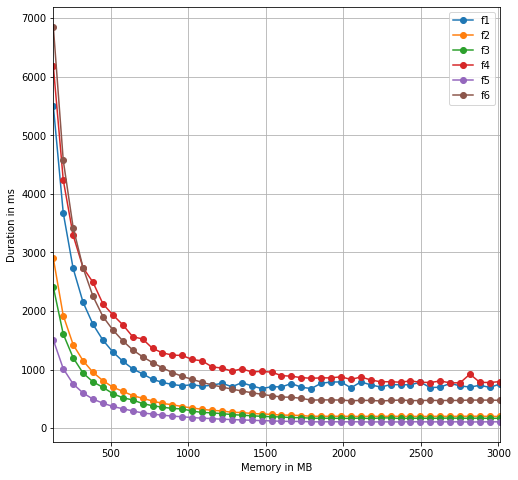

In [89]:
fig=plt.figure(figsize=(8,8))
ax=plt.subplot(111)
ax.grid()
ax.set_xlim(128,3008)
ax.plot(available_mem_list, f1_duration, marker='o', label='f1') 
ax.plot(available_mem_list, f2_duration, marker='o', label='f2') 
ax.plot(available_mem_list, f3_duration, marker='o', label='f3') 
ax.plot(available_mem_list, f4_duration, marker='o', label='f4') 
ax.plot(available_mem_list, f5_duration, marker='o', label='f5') 
ax.plot(available_mem_list, f6_duration, marker='o', label='f6') 
ax.legend()
ax.set_xlabel('Memory in MB')
ax.set_ylabel('Duration in ms')

## Use the PRCP algorithm to solve the Best Performance under the Budget Constraint (BPBC) problem

In [101]:
App = ServerlessAppWorkflow(G=App6_G.copy(), delayType='SFN')
optimizer = PerfOpt(App, generate_perf_profile=False)
# Budget constraint is 100 US dollars
print('Without BCR')
res1 = optimizer.PRCPG_BPBC(100, BCR=False) # Without BCR
print('----------------')
print('BCR RT/M greedy strategy, BCR threshold is 0.2')
res2 = optimizer.PRCPG_BPBC(100, BCR=True, BCRtype='RT/M', BCRthreshold=0.2) # BCR RT/M greedy strategy, BCR threshold is 0.2
print('----------------')
print('BCR ERT/C greedy strategy, BCR threshold is 0.2')
res3 = optimizer.PRCPG_BPBC(100, BCR=True, BCRtype='ERT/C', BCRthreshold=0.2) # BCR ERT/C greedy strategy, BCR threshold is 0.2
print('----------------')
print('BCR MAX greedy strategy, BCR threshold is 0.2')
res4 = optimizer.PRCPG_BPBC(100, BCR=True, BCRtype='MAX') # BCR MAX greedy strategy, BCR threshold is 0.2
print('----------------')

Without BCR
Optimized Memory Configuration: {1: 1088, 2: 1216, 3: 1024, 4: 2688, 5: 960, 6: 2240}
Average end-to-end response time: 2876.492557142856
Average Cost: 97.68528571428573
PRCP_BPBC Optimization Completed.
----------------
BCR RT/M greedy strategy, BCR threshold is 0.2
Optimized Memory Configuration: {1: 1472, 2: 1216, 3: 1024, 4: 2688, 5: 960, 6: 2048}
Average end-to-end response time: 2834.5468428571426
Average Cost: 99.09628571428571
PRCP_BPBC Optimization Completed.
----------------
BCR ERT/C greedy strategy, BCR threshold is 0.2
Optimized Memory Configuration: {1: 1088, 2: 768, 3: 1600, 4: 2688, 5: 1024, 6: 2240}
Average end-to-end response time: 3070.586499999999
Average Cost: 98.2782
PRCP_BPBC Optimization Completed.
----------------
BCR MAX greedy strategy, BCR threshold is 0.2
Optimized Memory Configuration: {1: 1472, 2: 768, 3: 1600, 4: 2688, 5: 1024, 6: 2048}
Average end-to-end response time: 3028.6407857142854
Average Cost: 99.6892
PRCP_BPBC Optimization Completed

## Use the PRCP algorithm to solve the Best Cost under the Performance Constraint (BCPC) problem

In [102]:
App = ServerlessAppWorkflow(G=App6_G.copy(), delayType='SFN')
optimizer = PerfOpt(App, generate_perf_profile=False)
# Performance constraint is 6400 ms
print('Without BCR')
res5 = optimizer.PRCPG_BCPC(6400, BCR=False) # Without BCR
print('----------------')
print('BCR M/RT greedy strategy, BCR threshold is 0.2')
res6 = optimizer.PRCPG_BCPC(6400, BCR=True, BCRtype='M/RT', BCRthreshold=0.2) # BCR M/RT greedy strategy, BCR threshold is 0.2
print('----------------')
print('BCR C/ERT greedy strategy, BCR threshold is 0.2')
res7 = optimizer.PRCPG_BCPC(6400, BCR=True, BCRtype='C/ERT', BCRthreshold=0.2) # BCR C/ERT greedy strategy, BCR threshold is 0.2
print('----------------')
print('BCR MAX greedy strategy, BCR threshold is 0.2')
res8 = optimizer.PRCPG_BCPC(6400, BCR=True, BCRtype='MAX') # BCR MAX greedy strategy, BCR threshold is 0.2
print('----------------')

Without BCR
Optimized Memory Configuration: {1: 832, 2: 896, 3: 768, 4: 320, 5: 384, 6: 960}
Average end-to-end response time: 6319.304634285715
Average Cost: 60.41328571428571
PRCPG_BCPC Optimization Completed.
----------------
BCR M/RT greedy strategy, BCR threshold is 0.2
Optimized Memory Configuration: {1: 832, 2: 896, 3: 768, 4: 320, 5: 960, 6: 960}
Average end-to-end response time: 6297.260771428572
Average Cost: 60.41351428571428
PRCPG_BCPC Optimization Completed.
----------------
BCR C/ERT greedy strategy, BCR threshold is 0.2
Optimized Memory Configuration: {1: 832, 2: 896, 3: 768, 4: 320, 5: 960, 6: 960}
Average end-to-end response time: 6297.260771428572
Average Cost: 60.41351428571428
PRCPG_BCPC Optimization Completed.
----------------
BCR MAX greedy strategy, BCR threshold is 0.2
Optimized Memory Configuration: {1: 832, 2: 896, 3: 768, 4: 320, 5: 384, 6: 960}
Average end-to-end response time: 6319.304634285715
Average Cost: 60.41328571428571
PRCPG_BCPC Optimization Complet